In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [10]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])


In [11]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [13]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [14]:
x_train = vectorize_sequences(train_data)
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [15]:
x_test = vectorize_sequences(test_data)
print(x_test[0])

[0. 1. 1. ... 0. 0. 0.]


In [20]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i,label] = 1
    return results

In [23]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [24]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [29]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
one_hot_test_labels


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [32]:
model.compile(optimizer = 'rmsprop', 
             loss = 'categorical_crossentropy', 
             metrics = ['accuracy'])

In [33]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [34]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [37]:
history = model.fit(partial_x_train, 
                   partial_y_train, 
                   epochs = 20, 
                   batch_size = 512, 
                   validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 2.6313 - accuracy: 0.5103 - val_loss: 1.7404 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.4238 - accuracy: 0.7077 - val_loss: 1.2896 - val_accuracy: 0.7270
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0549 - accuracy: 0.7823 - val_loss: 1.1348 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8394 - accuracy: 0.8237 - val_loss: 1.0330 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6790 - accuracy: 0.8583 - val_loss: 0.9901 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5458 - accuracy: 0.8895 - val_loss: 0.9530 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4508 - accuracy: 0.9078 - val_loss: 0.9079 - val_accuracy: 0.8080
Epoch 8/20
16

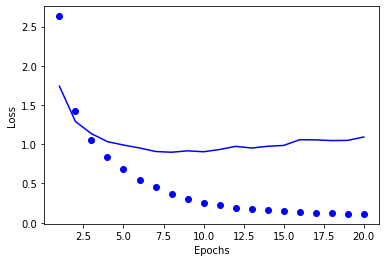

<Figure size 432x288 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

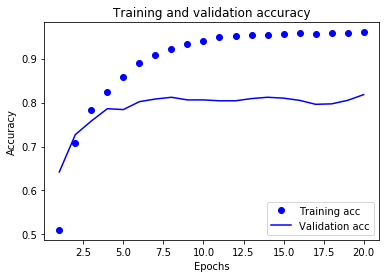

In [51]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [52]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [55]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy', 
             metrics = ['accuracy'])

In [56]:
model.fit(partial_x_train, 
         partial_y_train, 
         epochs = 9, 
         batch_size = 512, 
         validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 23ms/step - loss: 2.5721 - accuracy: 0.5113 - val_loss: 1.6882 - val_accuracy: 0.6470
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.3647 - accuracy: 0.7097 - val_loss: 1.2673 - val_accuracy: 0.7140
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 1.0177 - accuracy: 0.7760 - val_loss: 1.1176 - val_accuracy: 0.7490
Epoch 4/9
16/16 [==============================] - 0s 14ms/step - loss: 0.8020 - accuracy: 0.8275 - val_loss: 1.0039 - val_accuracy: 0.7880
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.6365 - accuracy: 0.8661 - val_loss: 1.0142 - val_accuracy: 0.7670
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5105 - accuracy: 0.8935 - val_loss: 0.9067 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4076 - accuracy: 0.9171 - val_loss: 0.8788 - val_accuracy: 0.8170
Epoch 8/9
16/16 [===

In [59]:
results

[1.0079331398010254, 0.7813891172409058]

In [63]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19367764915405164

In [64]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [65]:
np.sum(predictions[0])

1.0000001

In [66]:
np.argmax(predictions[0])

3

In [67]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [70]:
model.compile(optimizer = 'rmsprop', 
             loss = 'sparse_categorical_crossentropy', 
             metrics = ['acc'])

In [74]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [75]:
model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [76]:
model.fit(partial_x_train, 
         partial_y_train, 
         epochs = 20,
         batch_size = 128, 
         validation_data = (x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 3.1490 - accuracy: 0.2046 - val_loss: 2.4994 - val_accuracy: 0.4860
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 2.0381 - accuracy: 0.5466 - val_loss: 1.8140 - val_accuracy: 0.5610
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.6364 - accuracy: 0.5633 - val_loss: 1.6614 - val_accuracy: 0.5530
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.4746 - accuracy: 0.5654 - val_loss: 1.5867 - val_accuracy: 0.5510
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3364 - accuracy: 0.5843 - val_loss: 1.5079 - val_accuracy: 0.5680
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.2163 - accuracy: 0.6441 - val_loss: 1.4480 - val_accuracy: 0.6330
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1177 - accuracy: 0.6878 - val_loss: 1.4338 - val_accuracy: 0.6410
Epoch 8/20
63/63 [=